In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import PercentFormatter

colors = sns.color_palette("hls", 8)

In [182]:
df_census = pd.read_csv('/Users/katialopes-gilbert/data-files/ncis-and-census-data/us-census-data-transformed.csv')

df_fbi = pd.read_csv('/Users/katialopes-gilbert/data-files/ncis-and-census-data/gun_data_clean.csv')

In [183]:
df_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   State                                    50 non-null     object 
 1   Population 2016                          50 non-null     float64
 2   Population 2010                          50 non-null     float64
 3   Population Percent Change 2010-2016      50 non-null     float64
 4   Population 2010.1                        50 non-null     float64
 5   Under 5                                  50 non-null     float64
 6   Under 18                                 50 non-null     float64
 7   65 and over                              50 non-null     float64
 8   Percent Female                           50 non-null     float64
 9   Percent Black                            50 non-null     float64
 10  Percent American Indian                  50 non-null

In [4]:
df_fbi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11350 entries, 0 to 11349
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      11350 non-null  object 
 1   month-name                 11350 non-null  object 
 2   year                       11350 non-null  int64  
 3   state                      11350 non-null  object 
 4   handgun                    11350 non-null  float64
 5   long_gun                   11350 non-null  float64
 6   other                      5000 non-null   float64
 7   multiple                   11350 non-null  int64  
 8   private_sale_handgun       2500 non-null   float64
 9   private_sale_long_gun      2500 non-null   float64
 10  private_sale_other         2500 non-null   float64
 11  return_to_seller_handgun   2250 non-null   float64
 12  return_to_seller_long_gun  2500 non-null   float64
 13  return_to_seller_other     2050 non-null   flo

In [5]:
df_fbi.head()

,month,month-name,year,state,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,total_permits
0,2017-09-01,September,2017,Alabama,5734.0,6320.0,221.0,317,9.0,16.0,3.0,0.0,0.0,3.0,12623.0
1,2017-09-01,September,2017,Alaska,2320.0,2930.0,219.0,160,17.0,24.0,1.0,0.0,0.0,0.0,5671.0
2,2017-09-01,September,2017,Arizona,11063.0,7946.0,920.0,631,38.0,12.0,2.0,0.0,0.0,0.0,20612.0
3,2017-09-01,September,2017,Arkansas,4347.0,6063.0,165.0,366,13.0,23.0,0.0,0.0,2.0,1.0,10980.0
4,2017-09-01,September,2017,California,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,0.0,0.0,0.0,64730.0


I want to begin my analysis by visualizing the following:
1. Population growth by state from 2010 'Population, Cesnus, April 1, 2010' to 2016 'Population estimates, July 1, 2016,  (V2016)' using bar charts for each year for each state.
2. The distribution of race or ethnicity for each state. Use the following columns:
 14  Black or African American alone, percent, July 1, 2016,  (V2016),
 15  American Indian and Alaska Native alone, percent, July 1, 2016,  (V2016)
 16  Asian alone, percent, July 1, 2016,  (V2016)
 17  Native Hawaiian and Other Pacific Islander alone, percent, July 1, 2016,  (V2016)
 18  Two or More Races, percent, July 1, 2016,  (V2016)
 19  Hispanic or Latino, percent, July 1, 2016,  (V2016)
 20  White alone, not Hispanic or Latino, percent, July 1, 2016,  (V2016) 
3. Persons living in poverty in each state.
4. Total permits for each state adjusting for the population.

In [102]:
df_census.groupby('State')['Population 2010'].sum()

State
Alabama            4779736.0
Alaska              710231.0
Arizona            6392017.0
Arkansas           2915918.0
California        37253956.0
Colorado           5029196.0
Connecticut        3574097.0
Delaware            897934.0
Florida           18801310.0
Georgia            9687653.0
Hawaii             1360301.0
Idaho              1567582.0
Illinois          12830632.0
Indiana            6483802.0
Iowa               3046355.0
Kansas             2853118.0
Kentucky           4339367.0
Louisiana          4533372.0
Maine              1328361.0
Maryland           5773552.0
Massachusetts      6547629.0
Michigan           9883640.0
Minnesota          5303925.0
Mississippi        2967297.0
Missouri           5988927.0
Montana             989415.0
Nebraska           1826341.0
Nevada             2700551.0
New Hampshire      1316470.0
New Jersey         8791894.0
New Mexico         2059179.0
New York          19378102.0
North Carolina     9535483.0
North Dakota        672591.0
Ohio    

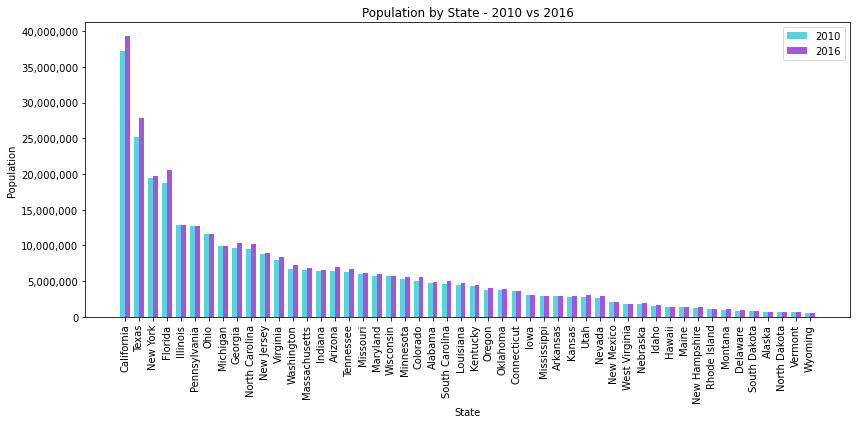

In [103]:
# population growth from 2010 to 2016

years = ['2010', '2016']
df_sorted = df_census.sort_values(by='Population 2010', ascending=False)
population_2010 = df_sorted['Population 2010'].values
population_2016 = df_sorted['Population 2016'].values
states = df_sorted['State'].values

bar_width = 0.35

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
index = np.arange(len(states))

ax.bar(index, population_2010, bar_width, label='2010', color=colors[4])
ax.bar(index + bar_width, population_2016, bar_width, label='2016', color=colors[6])

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(states, rotation=90)
ax.set_xlabel('State')
ax.set_ylabel('Population')
ax.set_title('Population by State - 2010 vs 2016')
ax.legend()

ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.tight_layout()
plt.show()

# Question - What states have the highest gun purchases per capita?

In order to answer this question, I will look at the census population in 2016 for each state. I will then take the total permits for each state and divide that by the population for each state and multiply the result by 100,000.

In [121]:
population_2016 = df_census[['State','Population 2016']]
population_2016

,State,Population 2016
0,Alabama,4863300.0
1,Alaska,741894.0
2,Arizona,6931071.0
3,Arkansas,2988248.0
4,California,39250017.0
5,Colorado,5540545.0
6,Connecticut,3576452.0
7,Delaware,952065.0
8,Florida,20612439.0
9,Georgia,10310371.0


In [105]:
df_fbi_2016 = df_fbi[df_fbi['year'] == 2016]

df_fbi_agg = df_fbi_2016.groupby('state').sum()

df_fbi_2016_aggregated = df_fbi_agg.reset_index()

df_fbi_2016_aggregated.drop(['year'], axis=1, inplace=True)

df_fbi_2016_aggregated

,state,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,total_permits
0,Alabama,153123.0,121963.0,6104.0,6545,72.0,65.0,4.0,3.0,2.0,0.0,287881.0
1,Alaska,37491.0,36887.0,2889.0,2316,39.0,66.0,1.0,2.0,3.0,0.0,79694.0
2,Arizona,166784.0,108988.0,13122.0,7908,76.0,56.0,11.0,11.0,11.0,1.0,296968.0
3,Arkansas,80244.0,82120.0,3059.0,4400,72.0,64.0,6.0,7.0,4.0,1.0,169977.0
4,California,560355.0,554550.0,211707.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1326612.0
5,Colorado,242502.0,180026.0,15890.0,14293,0.0,0.0,0.0,0.0,0.0,0.0,452711.0
6,Connecticut,122375.0,43813.0,2445.0,0,0.0,2.0,0.0,0.0,0.0,0.0,168635.0
7,Delaware,25574.0,21746.0,1268.0,1034,590.0,195.0,32.0,12.0,3.0,0.0,50454.0
8,Florida,662308.0,316232.0,42439.0,25142,369.0,143.0,4.0,2.0,0.0,0.0,1046639.0
9,Georgia,194800.0,128277.0,6474.0,7478,53.0,53.0,11.0,2.0,9.0,0.0,337157.0


In [116]:
# First, make sure both indexes are the same (the state names)
assert (df_fbi_2016_aggregated.index == population_2016.index).all()

# Then, create the new column
df_fbi_2016_aggregated['permits_per_100k'] = (df_fbi_2016_aggregated['total_permits'] / population_2016['Total Population']) * 100000


In [117]:
df_sorted = df_fbi_2016_aggregated.sort_values(by='permits_per_100k', ascending=False)
df_sorted

,state,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,total_permits,Permits per 100k,permits_per_100k
1,Alaska,37491.0,36887.0,2889.0,2316,39.0,66.0,1.0,2.0,3.0,0.0,79694.0,10741.965833,10741.965833
40,South Dakota,36520.0,49522.0,3134.0,2184,15.0,30.0,0.0,0.0,2.0,0.0,91407.0,10561.739850,10561.739850
47,West Virginia,92124.0,81105.0,3643.0,5283,75.0,61.0,8.0,7.0,7.0,0.0,182313.0,9956.463376,9956.463376
25,Montana,37547.0,56834.0,2142.0,2678,20.0,24.0,2.0,8.0,17.0,0.0,99272.0,9522.311323,9522.311323
49,Wyoming,22569.0,25815.0,1457.0,1295,9.0,21.0,2.0,1.0,8.0,1.0,51178.0,8740.890280,8740.890280
28,New Hampshire,68529.0,44681.0,2206.0,55,65.0,35.0,8.0,0.0,4.0,2.0,115585.0,8659.382152,8659.382152
24,Missouri,274754.0,202708.0,17404.0,12753,370.0,260.0,30.0,19.0,18.0,0.0,508316.0,8342.622682,8342.622682
41,Tennessee,319169.0,210161.0,5011.0,11092,0.0,0.0,0.0,0.0,0.0,0.0,545433.0,8200.527605,8200.527605
35,Oklahoma,166181.0,130514.0,13098.0,10661,247.0,236.0,47.0,17.0,12.0,4.0,321017.0,8181.776707,8181.776707
5,Colorado,242502.0,180026.0,15890.0,14293,0.0,0.0,0.0,0.0,0.0,0.0,452711.0,8170.874887,8170.874887


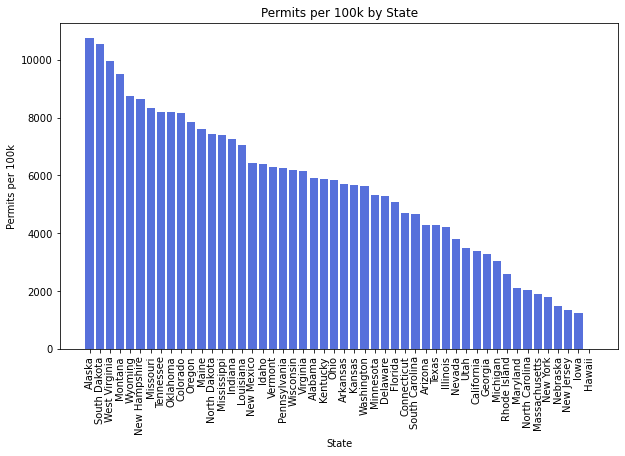

In [123]:
fig, ax = plt.subplots(figsize=(10,6))

# Bar plot
ax.bar(df_sorted['state'], df_sorted['permits_per_100k'], color=colors[5])

# Add labels
ax.set_xlabel('State')
ax.set_ylabel('Permits per 100k')
ax.set_title('Permits per 100k by State')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

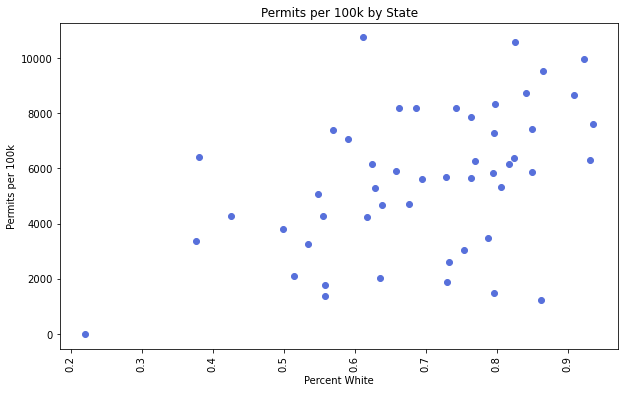

In [126]:
assert (df_fbi_2016_aggregated.index == df_census.index).all()

fig, ax = plt.subplots(figsize=(10,6))

# Scatter plot
ax.scatter(df_census['Percent White'], df_fbi_2016_aggregated['permits_per_100k'], color=colors[5])

# Add labels
ax.set_xlabel('Percent White')
ax.set_ylabel('Permits per 100k')
ax.set_title('Permits per 100k by State')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

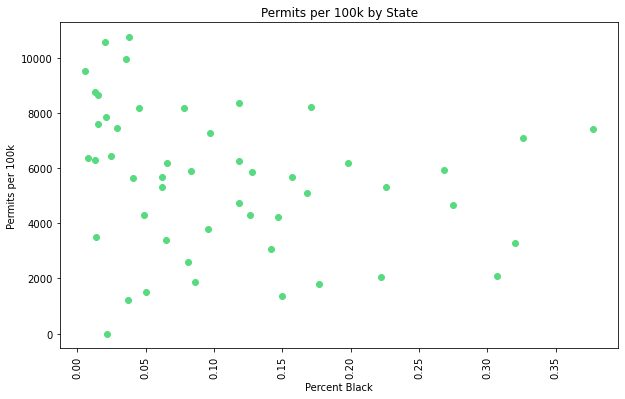

In [136]:
assert (df_fbi_2016_aggregated.index == df_census.index).all()

fig, ax = plt.subplots(figsize=(10,6))

# Scatter plot
ax.scatter(df_census['Percent Black'], df_fbi_2016_aggregated['permits_per_100k'], color=colors[3])

# Add labels
ax.set_xlabel('Percent Black')
ax.set_ylabel('Permits per 100k')
ax.set_title('Permits per 100k by State')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

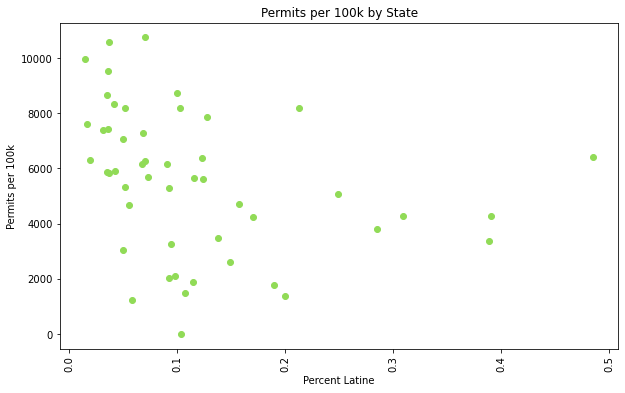

In [138]:
assert (df_fbi_2016_aggregated.index == df_census.index).all()

fig, ax = plt.subplots(figsize=(10,6))

# Scatter plot
ax.scatter(df_census['Percent Latine'], df_fbi_2016_aggregated['permits_per_100k'], color=colors[2])

# Add labels
ax.set_xlabel('Percent Latine')
ax.set_ylabel('Permits per 100k')
ax.set_title('Permits per 100k by State')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

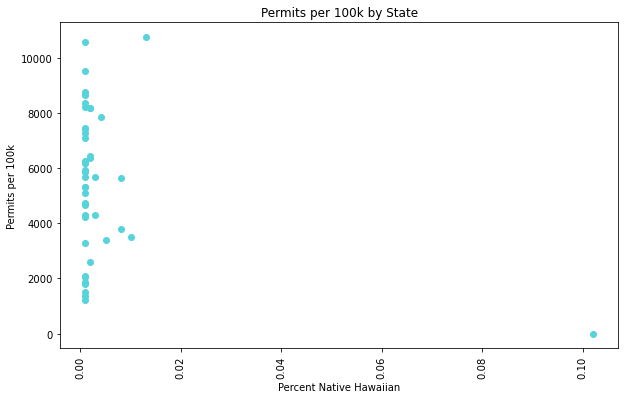

In [134]:
assert (df_fbi_2016_aggregated.index == df_census.index).all()

fig, ax = plt.subplots(figsize=(10,6))

# Scatter plot
ax.scatter(df_census['Percent Native Hawaiian'], df_fbi_2016_aggregated['permits_per_100k'], color=colors[4])

# Add labels
ax.set_xlabel('Percent Native Hawaiian')
ax.set_ylabel('Permits per 100k')
ax.set_title('Permits per 100k by State')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

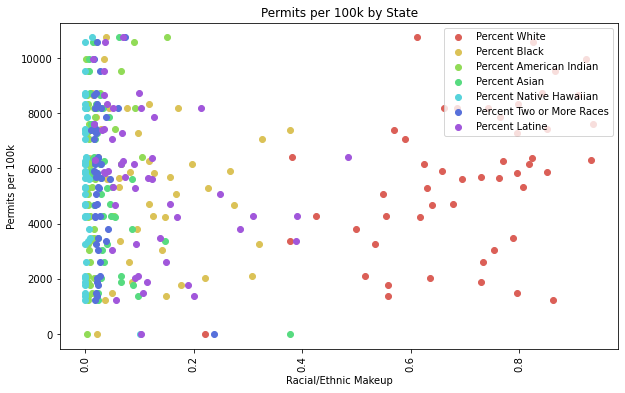

In [133]:
assert (df_fbi_2016_aggregated.index == df_census.index).all()

df_races = df_census[['Percent White', 'Percent Black', 'Percent American Indian', 'Percent Asian', 
                               'Percent Native Hawaiian', 'Percent Two or More Races', 'Percent Latine']]

fig, ax = plt.subplots(figsize=(10,6))

# Scatter plot
for i, col in enumerate(df_races.columns):
    ax.scatter(df_races[col], df_fbi_2016_aggregated['permits_per_100k'], color=colors[i], label=col)
                     
#ax.scatter(df_census['Percent Black'], df_fbi_2016_aggregated['permits_per_100k'], color=colors[5])

# Add labels
ax.set_xlabel('Racial/Ethnic Makeup')
ax.set_ylabel('Permits per 100k')
ax.set_title('Permits per 100k by State')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

ax.legend(loc='upper right')

# Show the plot
plt.show()

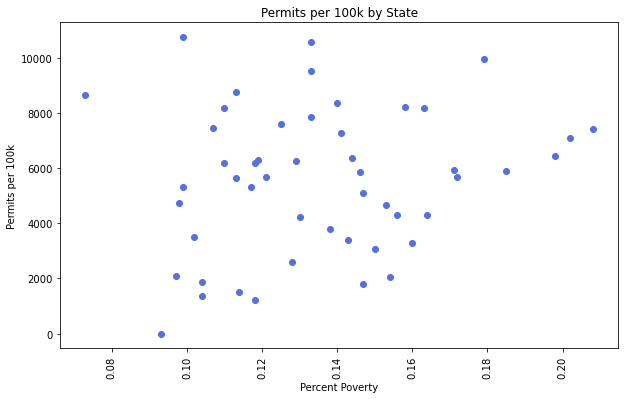

In [139]:
assert (df_fbi_2016_aggregated.index == df_census.index).all()

fig, ax = plt.subplots(figsize=(10,6))

# Bar plot
ax.scatter(df_census['Percent Poverty'], df_fbi_2016_aggregated['permits_per_100k'], color=colors[5])

# Add labels
ax.set_xlabel('Percent Poverty')
ax.set_ylabel('Permits per 100k')
ax.set_title('Permits per 100k by State')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

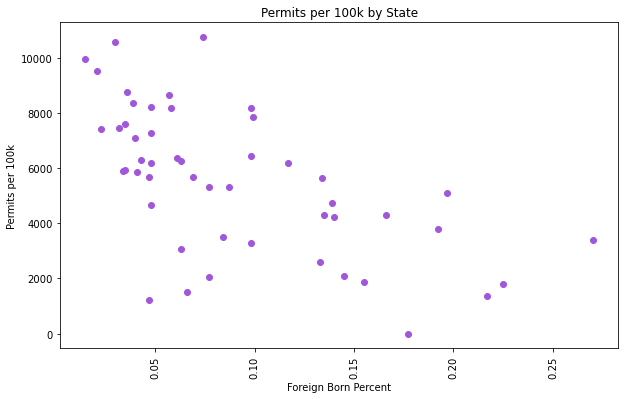

In [142]:
assert (df_fbi_2016_aggregated.index == df_census.index).all()

fig, ax = plt.subplots(figsize=(10,6))

# Bar plot
ax.scatter(df_census['Foreign Born Percent'], df_fbi_2016_aggregated['permits_per_100k'], color=colors[6])

# Add labels
ax.set_xlabel('Foreign Born Percent')
ax.set_ylabel('Permits per 100k')
ax.set_title('Permits per 100k by State')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

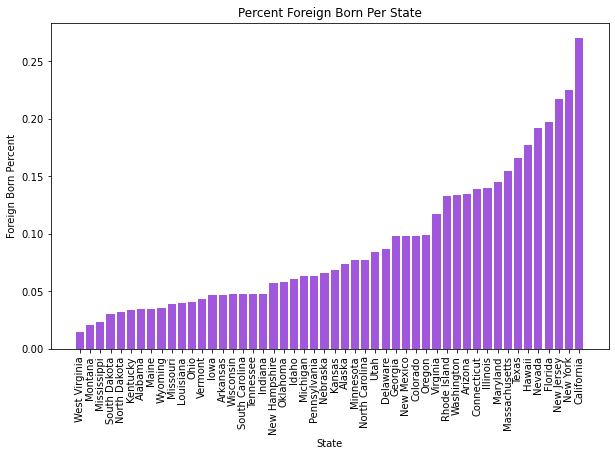

In [155]:
df_census_sorted = df_census.sort_values(by='Foreign Born Percent')

fig, ax = plt.subplots(figsize=(10,6))

# Bar plot
ax.bar(df_census_sorted['State'], df_census_sorted['Foreign Born Percent'], color=colors[6])

# Add labels
ax.set_xlabel('State')
ax.set_ylabel('Foreign Born Percent')
ax.set_title('Percent Foreign Born Per State')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


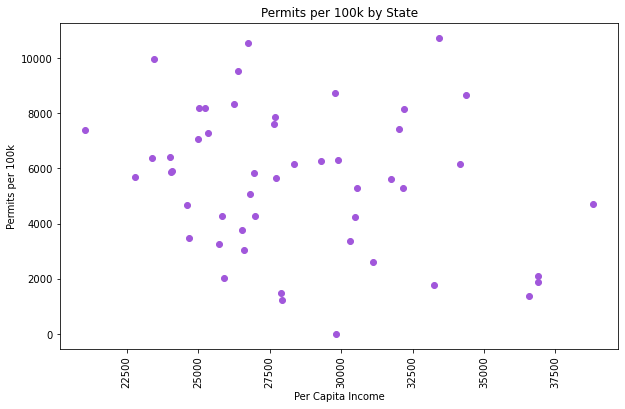

In [144]:
assert (df_fbi_2016_aggregated.index == df_census.index).all()



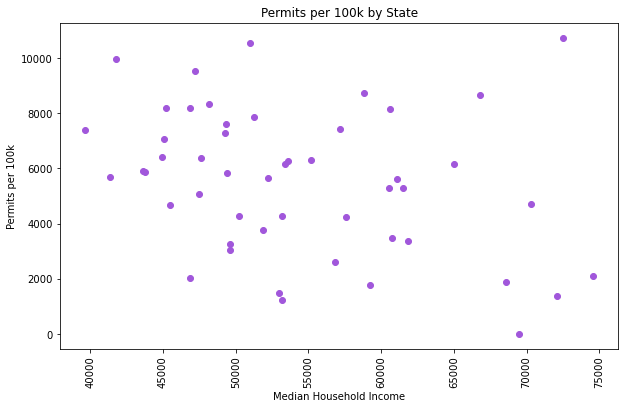

In [145]:
fig, ax = plt.subplots(figsize=(10,6))

# Bar plot
ax.scatter(df_census['Median Household Income'], df_fbi_2016_aggregated['permits_per_100k'], color=colors[6])

# Add labels
ax.set_xlabel('Median Household Income')
ax.set_ylabel('Permits per 100k')
ax.set_title('Permits per 100k by State')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


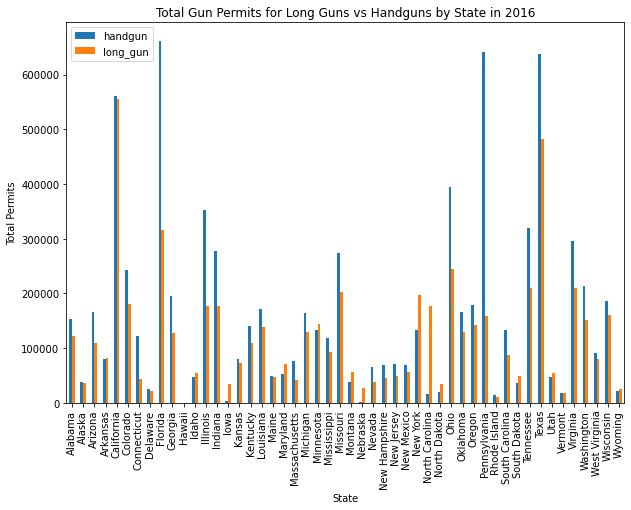

In [147]:
df_fbi_2016 = df_fbi[df_fbi['year'] == 2016]
df_grouped = df_fbi_2016.groupby('state')[['handgun', 'long_gun']].sum()
df_grouped.plot(kind='bar', stacked=False, figsize=(10,7))
plt.xlabel('State')
plt.ylabel('Total Permits')
plt.title('Total Gun Permits for Long Guns vs Handguns by State in 2016')
plt.show()


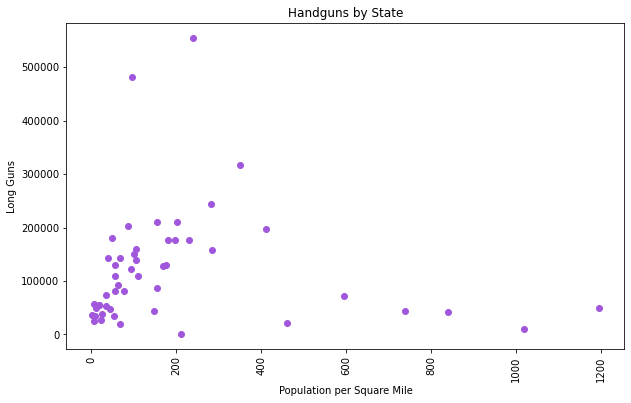

In [152]:
fig, ax = plt.subplots(figsize=(10,6))

# Bar plot
ax.scatter(df_census['Population per Square Mile'], df_fbi_2016_aggregated['long_gun'], color=colors[6])

# Add labels
ax.set_xlabel('Population per Square Mile')
ax.set_ylabel('Long Guns')
ax.set_title('Handguns by State')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


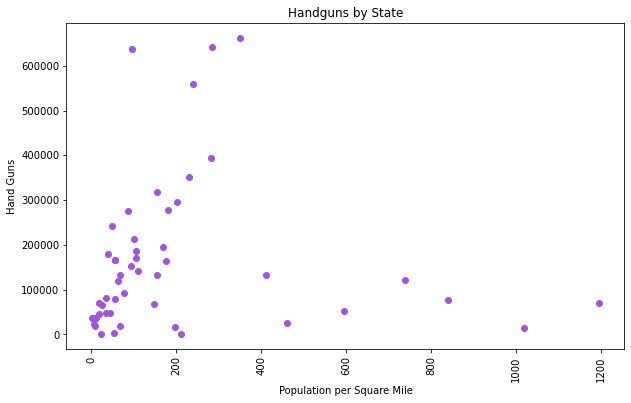

In [153]:
fig, ax = plt.subplots(figsize=(10,6))

# Bar plot
ax.scatter(df_census['Population per Square Mile'], df_fbi_2016_aggregated['handgun'], color=colors[6])

# Add labels
ax.set_xlabel('Population per Square Mile')
ax.set_ylabel('Hand Guns')
ax.set_title('Handguns by State')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()


In [158]:
# Filter the dataframe by year if necessary
df_fbi = df_fbi[df_fbi['year'] == 2016]

# Aggregate total permits per state per month
df_monthly_permits = df_fbi.groupby(['state', 'month-name'])['total_permits'].sum().reset_index()

# Find the month with maximum permits for each state
df_busiest_month = df_monthly_permits.loc[df_monthly_permits.groupby('state')['total_permits'].idxmax()]

# Drop 'total_permits' column
df_busiest_month = df_busiest_month.drop(columns=['total_permits'])

# Print the result
print(df_busiest_month)

              state month-name
3           Alabama   February
22           Alaska    October
26          Arizona   December
38         Arkansas   December
50       California   December
62         Colorado   December
79      Connecticut      March
86         Delaware   December
98          Florida   December
110         Georgia   December
120          Hawaii      April
134           Idaho   December
145        Illinois     August
158         Indiana   December
177            Iowa   November
182          Kansas   December
194        Kentucky   December
206       Louisiana   December
226           Maine    October
237        Maryland   November
245   Massachusetts       July
261        Michigan   November
274       Minnesota    October
278     Mississippi   December
290        Missouri   December
310         Montana    October
314        Nebraska   December
326          Nevada   December
345   New Hampshire   November
357      New Jersey   November
362      New Mexico   December
381     

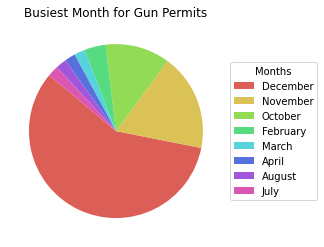

In [177]:
# Count the number of states with each month as their busiest
month_counts = df_busiest_month['month-name'].value_counts()

# Create a pie chart
fig, ax = plt.subplots()

wedges, texts = ax.pie(month_counts, colors=colors, startangle=140)

# Add a legend outside of the plot
ax.legend(wedges, month_counts.index,
          title="Months",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Add a title
ax.set_title('Busiest Month for Gun Permits')

# Show the plot
plt.show()


In [160]:
month_counts

December    29
November     9
October      6
February     2
March        1
April        1
August       1
July         1
Name: month-name, dtype: int64

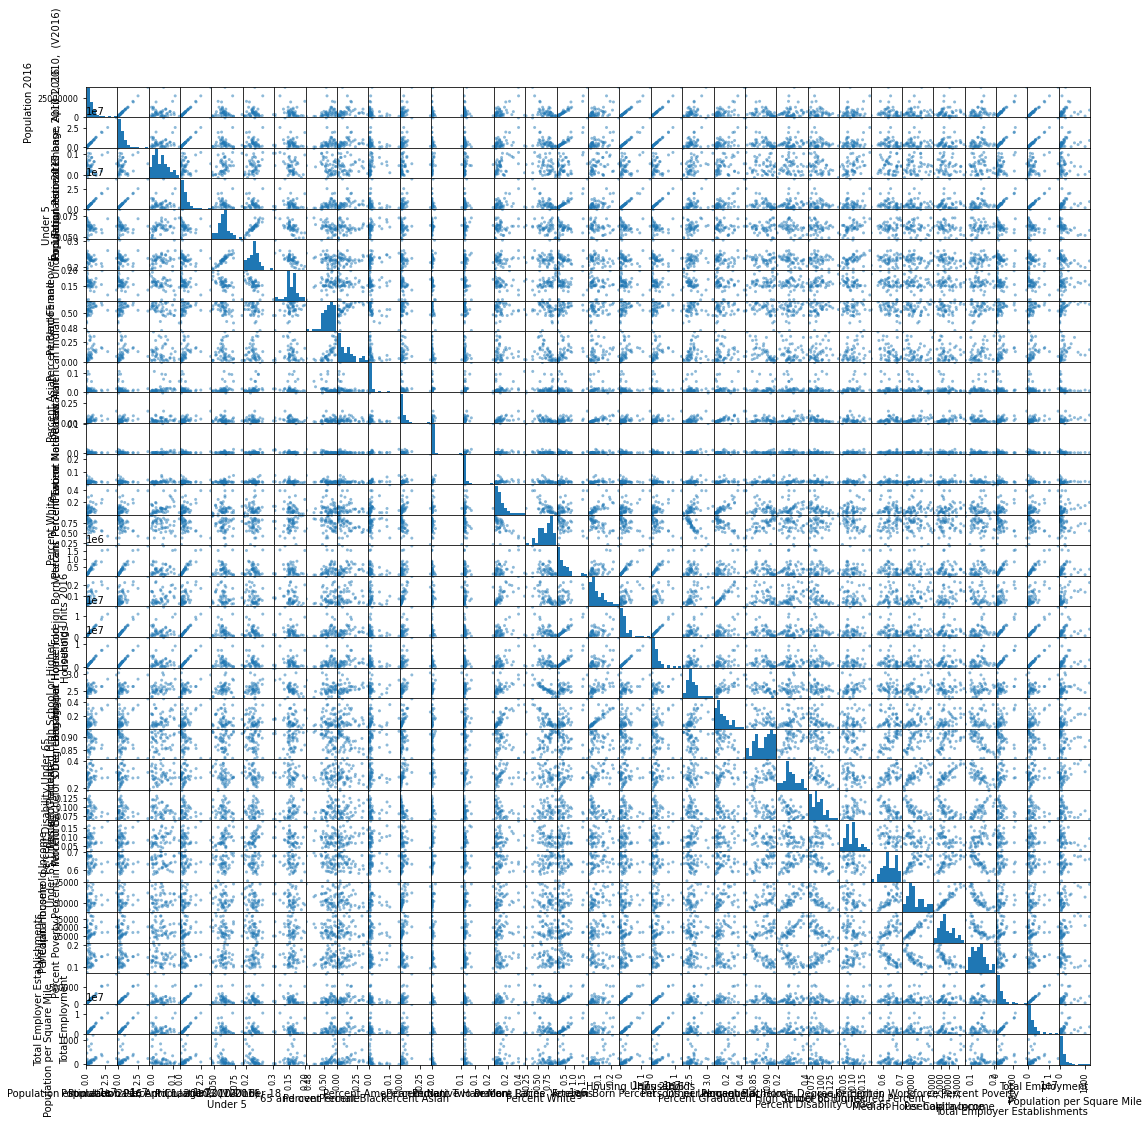

In [178]:
pd.plotting.scatter_matrix(df_census, figsize=(18,18));

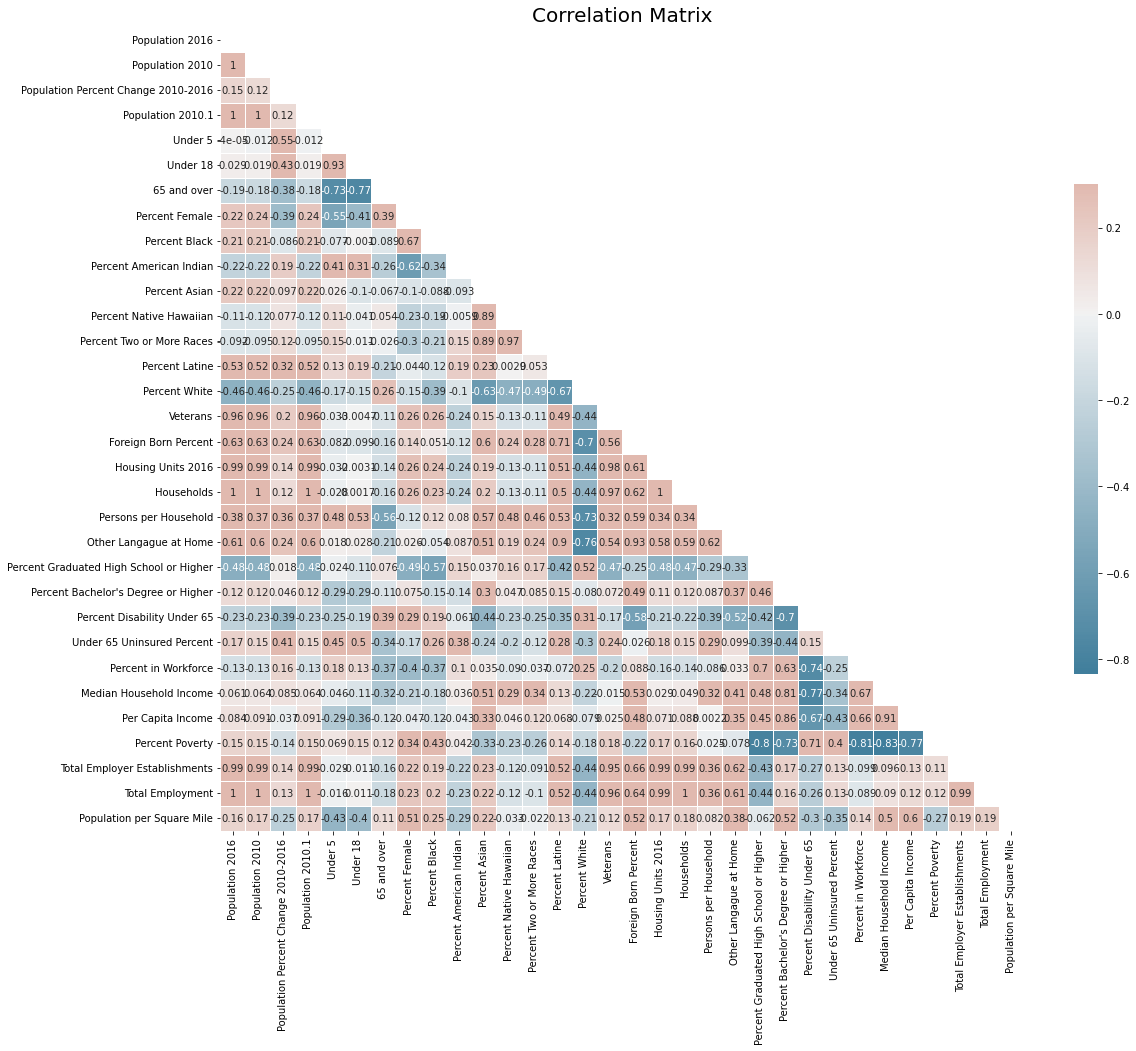

In [184]:
import seaborn as sns

# Calculate correlation matrix
corr = df_census.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix', fontsize=20)
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10, rotation=0)
plt.show()

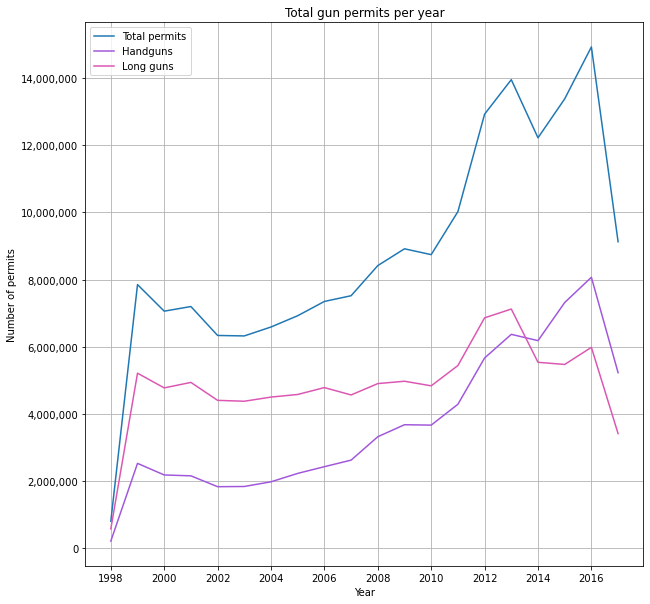

In [218]:
import matplotlib.pyplot as plt

# Group by year and sum the counts
df_grouped = df_fbi.groupby('year').sum()

fig, ax = plt.subplots(figsize=(10, 10))

# Format y-axis
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.plot(df_grouped.index, df_grouped['total_permits'], label='Total permits')
plt.plot(df_grouped.index, df_grouped['handgun'], label='Handguns', color=colors[6])
plt.plot(df_grouped.index, df_grouped['long_gun'], label='Long guns', color=colors[7])

start, end = df_grouped.index.min(), df_grouped.index.max()
ax.xaxis.set_ticks(np.arange(start, end + 1, 2))

plt.title('Total gun permits per year')
plt.xlabel('Year')
plt.ylabel('Number of permits')
plt.legend()
plt.grid(True)

plt.show()


In [222]:
df_fbi_subset = df_fbi[df_fbi['year'].isin([2010, 2016])]

df_fbi_yearly = df_fbi_subset.groupby(['state', 'year']).sum().reset_index()

df_fbi_yearly

,state,year,handgun,long_gun,other,multiple,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,total_permits
0,Alabama,2010,116963.0,136519.0,1771.0,5465,0.0,0.0,0.0,0.0,0.0,0.0,260718.0
1,Alabama,2016,153123.0,121963.0,6104.0,6545,72.0,65.0,4.0,3.0,2.0,0.0,287881.0
2,Alaska,2010,25720.0,33177.0,825.0,1519,0.0,0.0,0.0,0.0,0.0,0.0,61241.0
3,Alaska,2016,37491.0,36887.0,2889.0,2316,39.0,66.0,1.0,2.0,3.0,0.0,79694.0
4,Arizona,2010,89162.0,69067.0,2091.0,3768,0.0,0.0,0.0,0.0,0.0,0.0,164088.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,West Virginia,2016,92124.0,81105.0,3643.0,5283,75.0,61.0,8.0,7.0,7.0,0.0,182313.0
96,Wisconsin,2010,62619.0,127101.0,1412.0,107,0.0,0.0,0.0,0.0,0.0,0.0,191239.0
97,Wisconsin,2016,186300.0,159784.0,9867.0,523,56.0,68.0,7.0,0.0,6.0,0.0,356611.0
98,Wyoming,2010,14589.0,21490.0,303.0,817,0.0,0.0,0.0,0.0,0.0,0.0,37199.0
